# Phase 3: Visualization and Analytics - Company Sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('processed_sales.xlsx')
df

,Comp,Code,Item Description,Packing,Stock,Qnty,Sales
0,KWA,60496,ICE CREAM (RS10),25G,472,360,3600.00
1,GENR,21986,HALLS,1PC,235,182,182.00
2,DIN,57932,ICE CREAM (RS.20),PACK,470,158,3160.00
3,FDC,15063,ELECTRAL POWDER,21.80GM,14,137,3335.95
4,P&G,53290,VICKS COUGH DROPS,1PC,707,127,127.00
...,...,...,...,...,...,...,...
3389,ZHL,62391,STEOMIN OS TAB,10 TAB,1,-3,-570.00
3390,CIPL,1708,AMANTREL,15C,4,-3,-733.47
3391,DAYL,59958,ROZUTION T TAB,10TAB,4,-4,-516.00
3392,DAYL,65416,ZREPAG 2MF,10T,5,-5,-800.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Comp              3394 non-null   object 
 1   Code              3394 non-null   int64  
 2   Item Description  3394 non-null   object 
 3   Packing           3394 non-null   object 
 4   Stock             3394 non-null   int64  
 5   Qnty              3394 non-null   int64  
 6   Sales             3394 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 185.7+ KB


In [4]:
df.describe()

,Code,Stock,Qnty,Sales
count,3394.000000,3394.000000,3394.000000,3394.000000
mean,37492.681202,6.984973,3.781674,444.897773
std,20572.813897,53.209611,10.605528,626.996391
min,1.000000,-1.000000,-7.000000,-997.500000
25%,19626.500000,1.000000,1.000000,115.000000
50%,38292.500000,1.000000,2.000000,235.565000
75%,58143.500000,3.000000,3.000000,518.000000
max,65527.000000,2374.000000,360.000000,8250.000000


*Firstly, we will identify if we can group the data by any means.*

In [9]:
comp_agg = df.groupby('Comp')[['Stock', 'Qnty', 'Sales']].sum()
comp_agg

,Stock,Qnty,Sales
Comp,,,
.,1,2,314.92
0000,32,39,10009.00
0311,5,14,7490.00
1,1,10,390.40
112,2,2,530.00
...,...,...,...
ZUVE,6,8,1016.65
ZYDE,1,4,424.55
ZYDU,3,3,2361.50


*As we can see, we have 482 different companies, and while visualizing these can be a pain, we will stil try to generate some sort of analysis from it.*

In [12]:
comp_agg.sort_values(['Sales' , 'Qnty'], inplace=True, ascending = False)
comp_agg

,Stock,Qnty,Sales
Comp,,,
SUN,220,477,84402.05
GENR,4573,1080,52690.56
ALKM,118,234,43989.22
TORR,97,217,42969.83
INTA,112,184,39058.33
...,...,...,...
ELDG,2,0,0.00
UNP,1,0,0.00
LEKR,3,0,-3.30


*The dataframe we have generated is quite an interesting one, we can perform many analysis on solely this one dataset.\
First, I will generate a bar chart of top 10 - 20 companies by sales.*

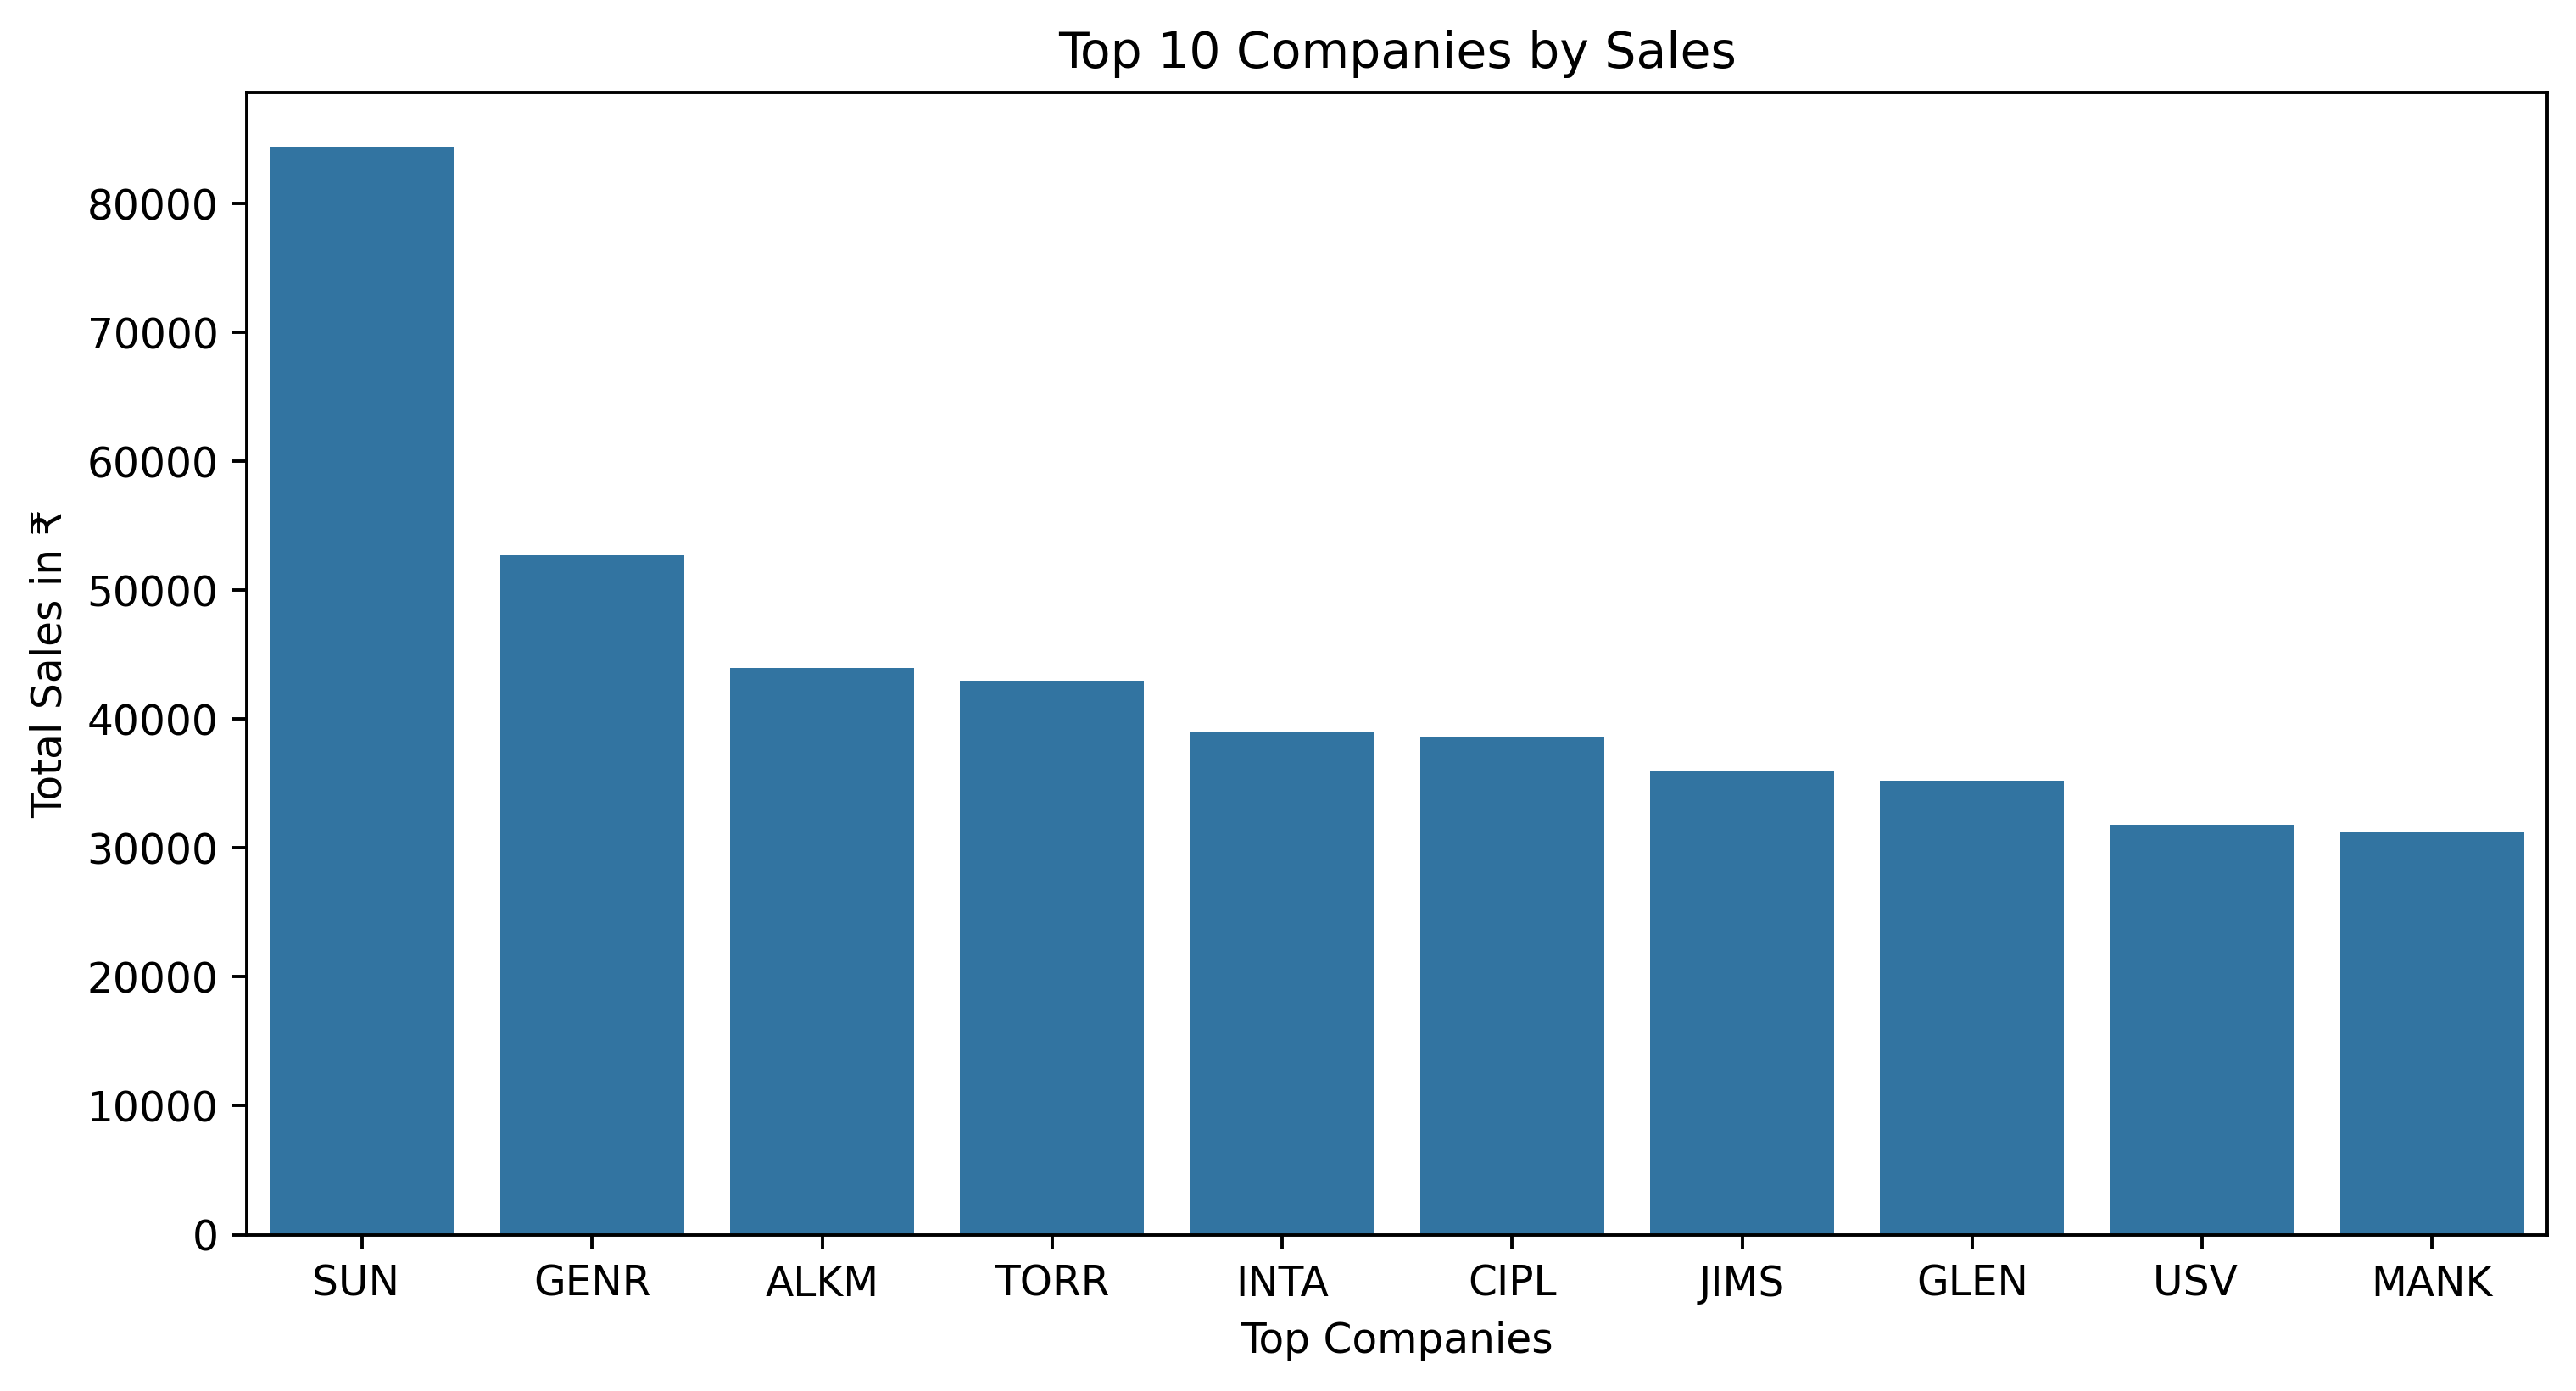

In [16]:
plt.figure(figsize=(10, 5), dpi = 350)
sns.barplot(data = comp_agg[:10], x = 'Comp', y = 'Sales')
plt.title('Top 10 Companies by Sales')
plt.xlabel('Top Companies')
plt.ylabel('Total Sales in ₹')
plt.savefig('Top 10 Companies by Sales.jpg', format='jpg')
plt.show()

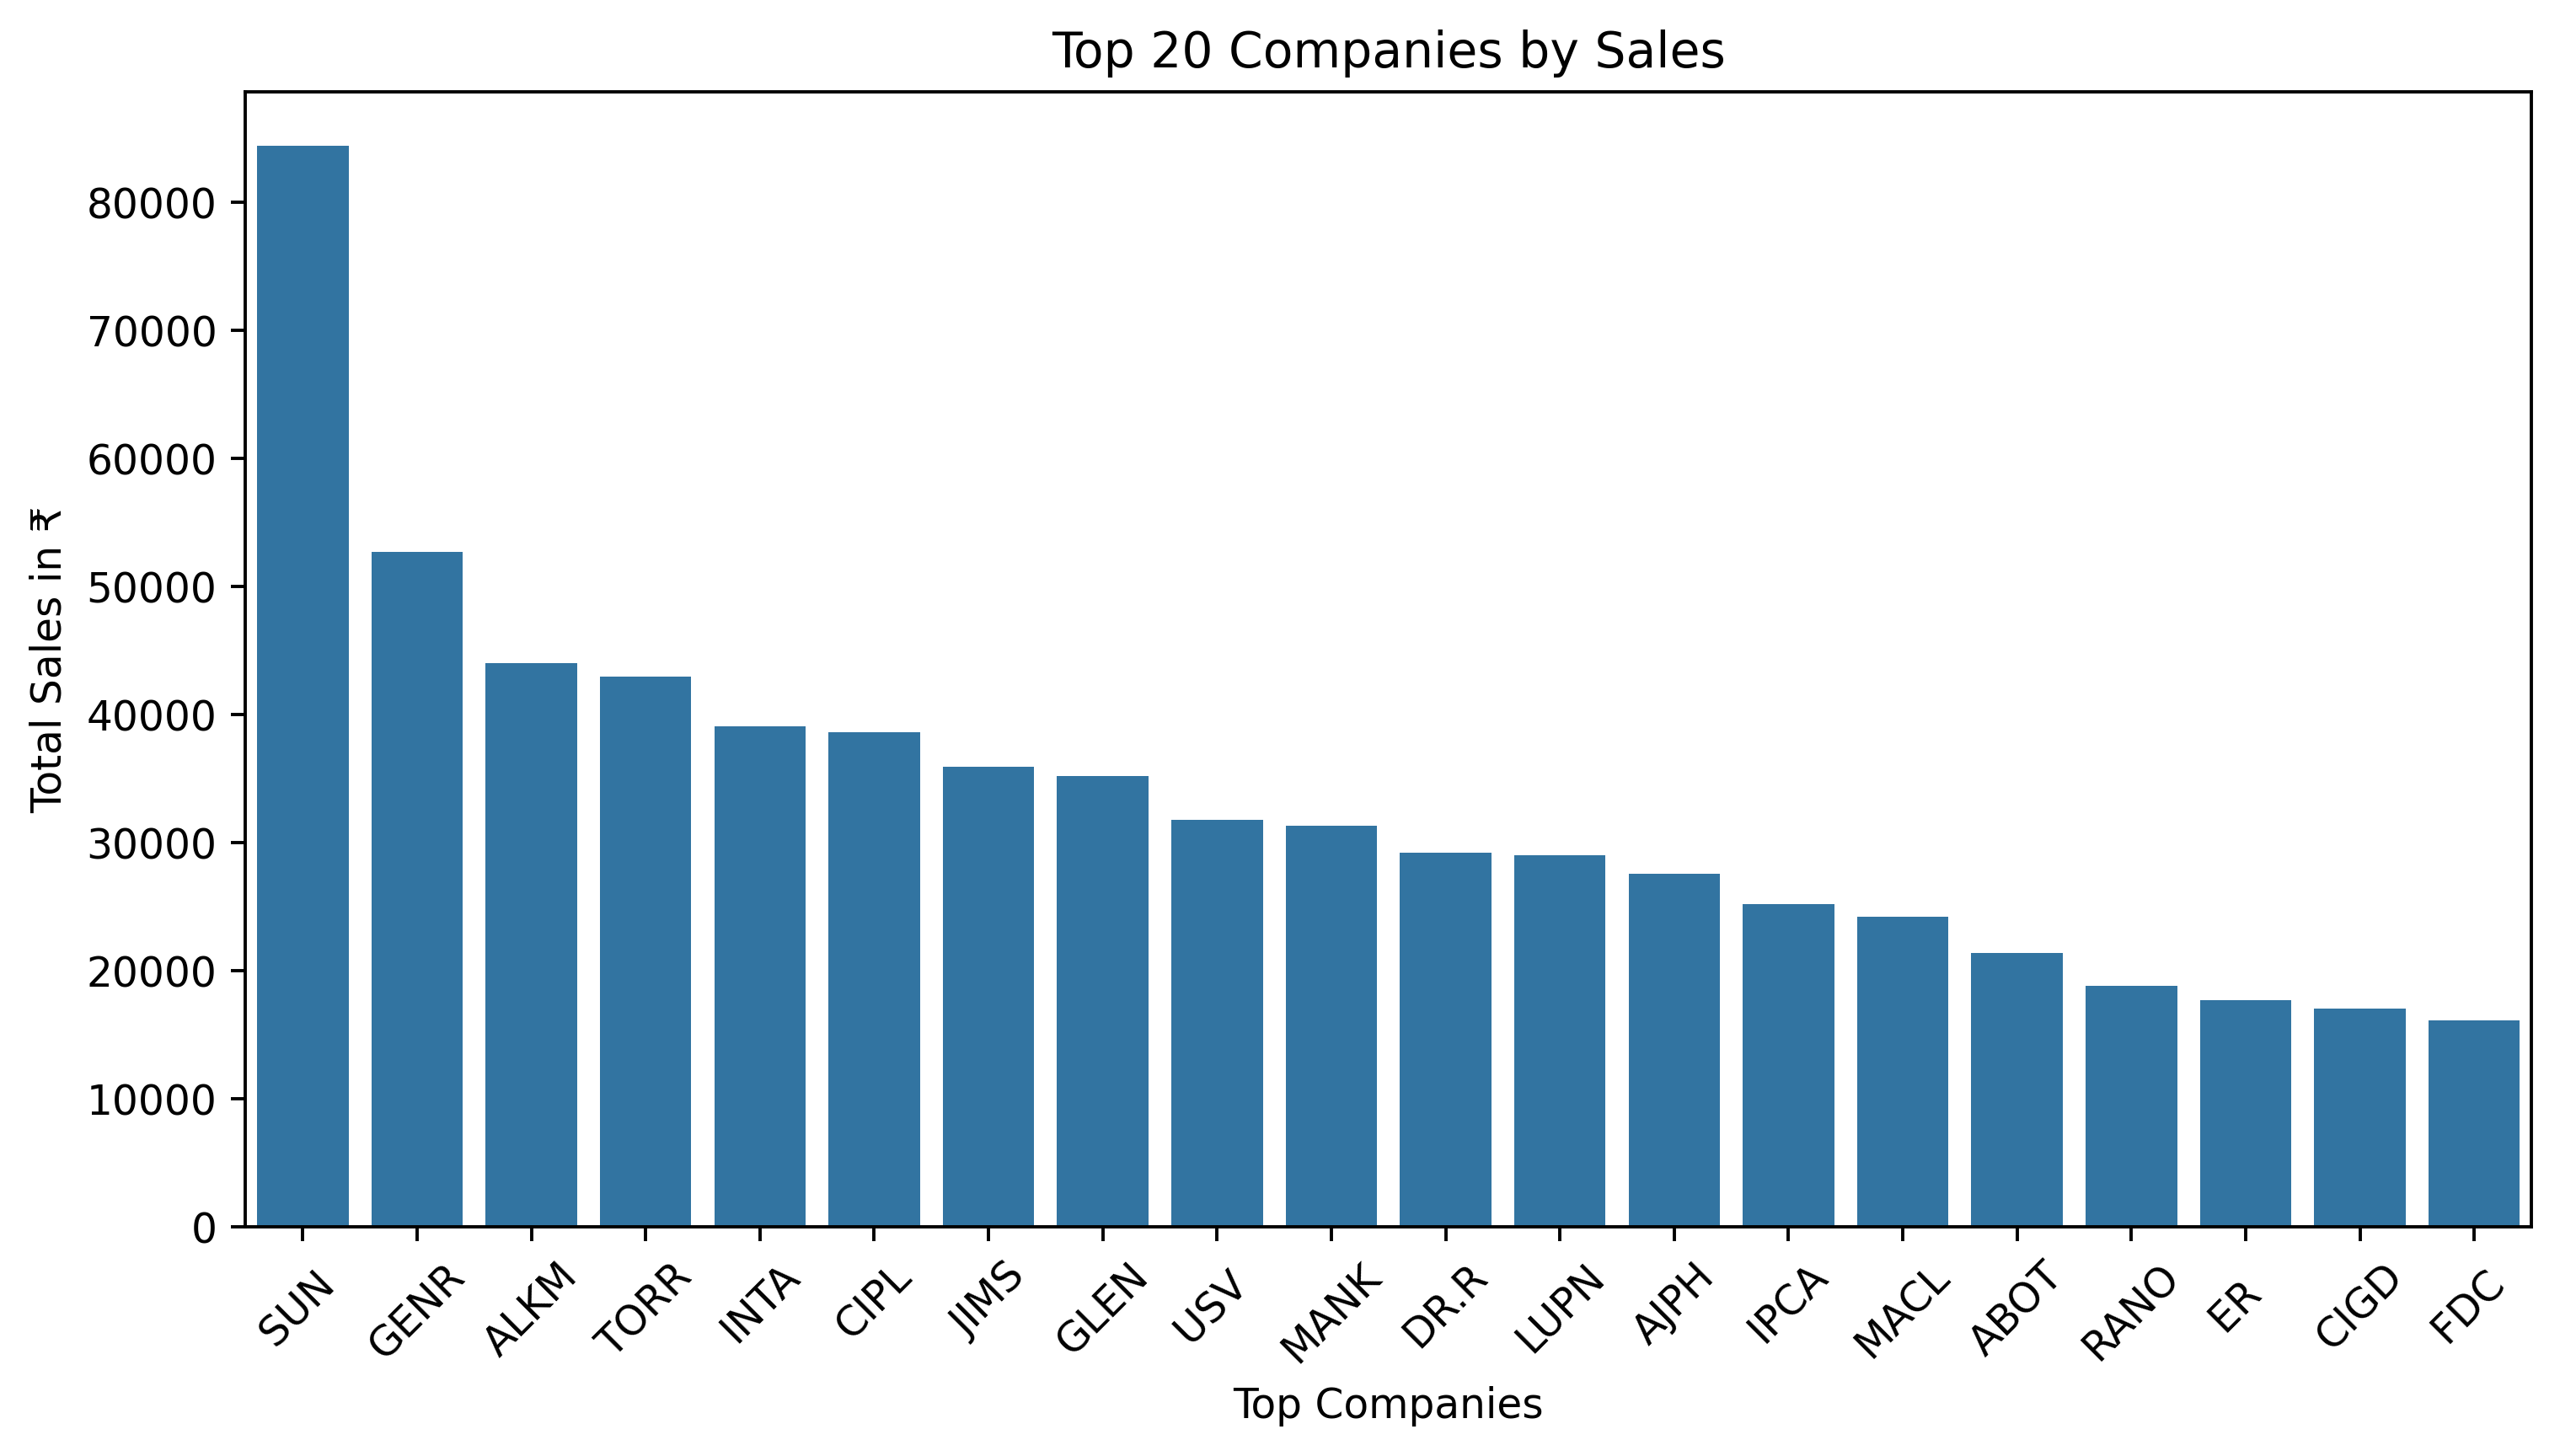

In [18]:
plt.figure(figsize=(10, 5), dpi = 350)
sns.barplot(data = comp_agg[:20], x = 'Comp', y = 'Sales')
plt.title('Top 20 Companies by Sales')
plt.xlabel('Top Companies')
plt.xticks(rotation= 45)
plt.ylabel('Total Sales in ₹')
plt.savefig('Top 20 Companies by Sales.jpg', format='jpg')
plt.show()

*Let us also check top 10 and top 20 companies by Quantity*

In [22]:
comp_qnty_agg = comp_agg.sort_values(['Qnty', 'Sales'], ascending = False)
comp_qnty_agg

,Stock,Qnty,Sales
Comp,,,
GENR,4573,1080,52690.56
CIPL,344,549,38612.63
KWA,802,525,12056.00
SUN,220,477,84402.05
MANK,220,344,31297.01
...,...,...,...
OC,8,1,-67.62
ELDG,2,0,0.00
UNP,1,0,0.00


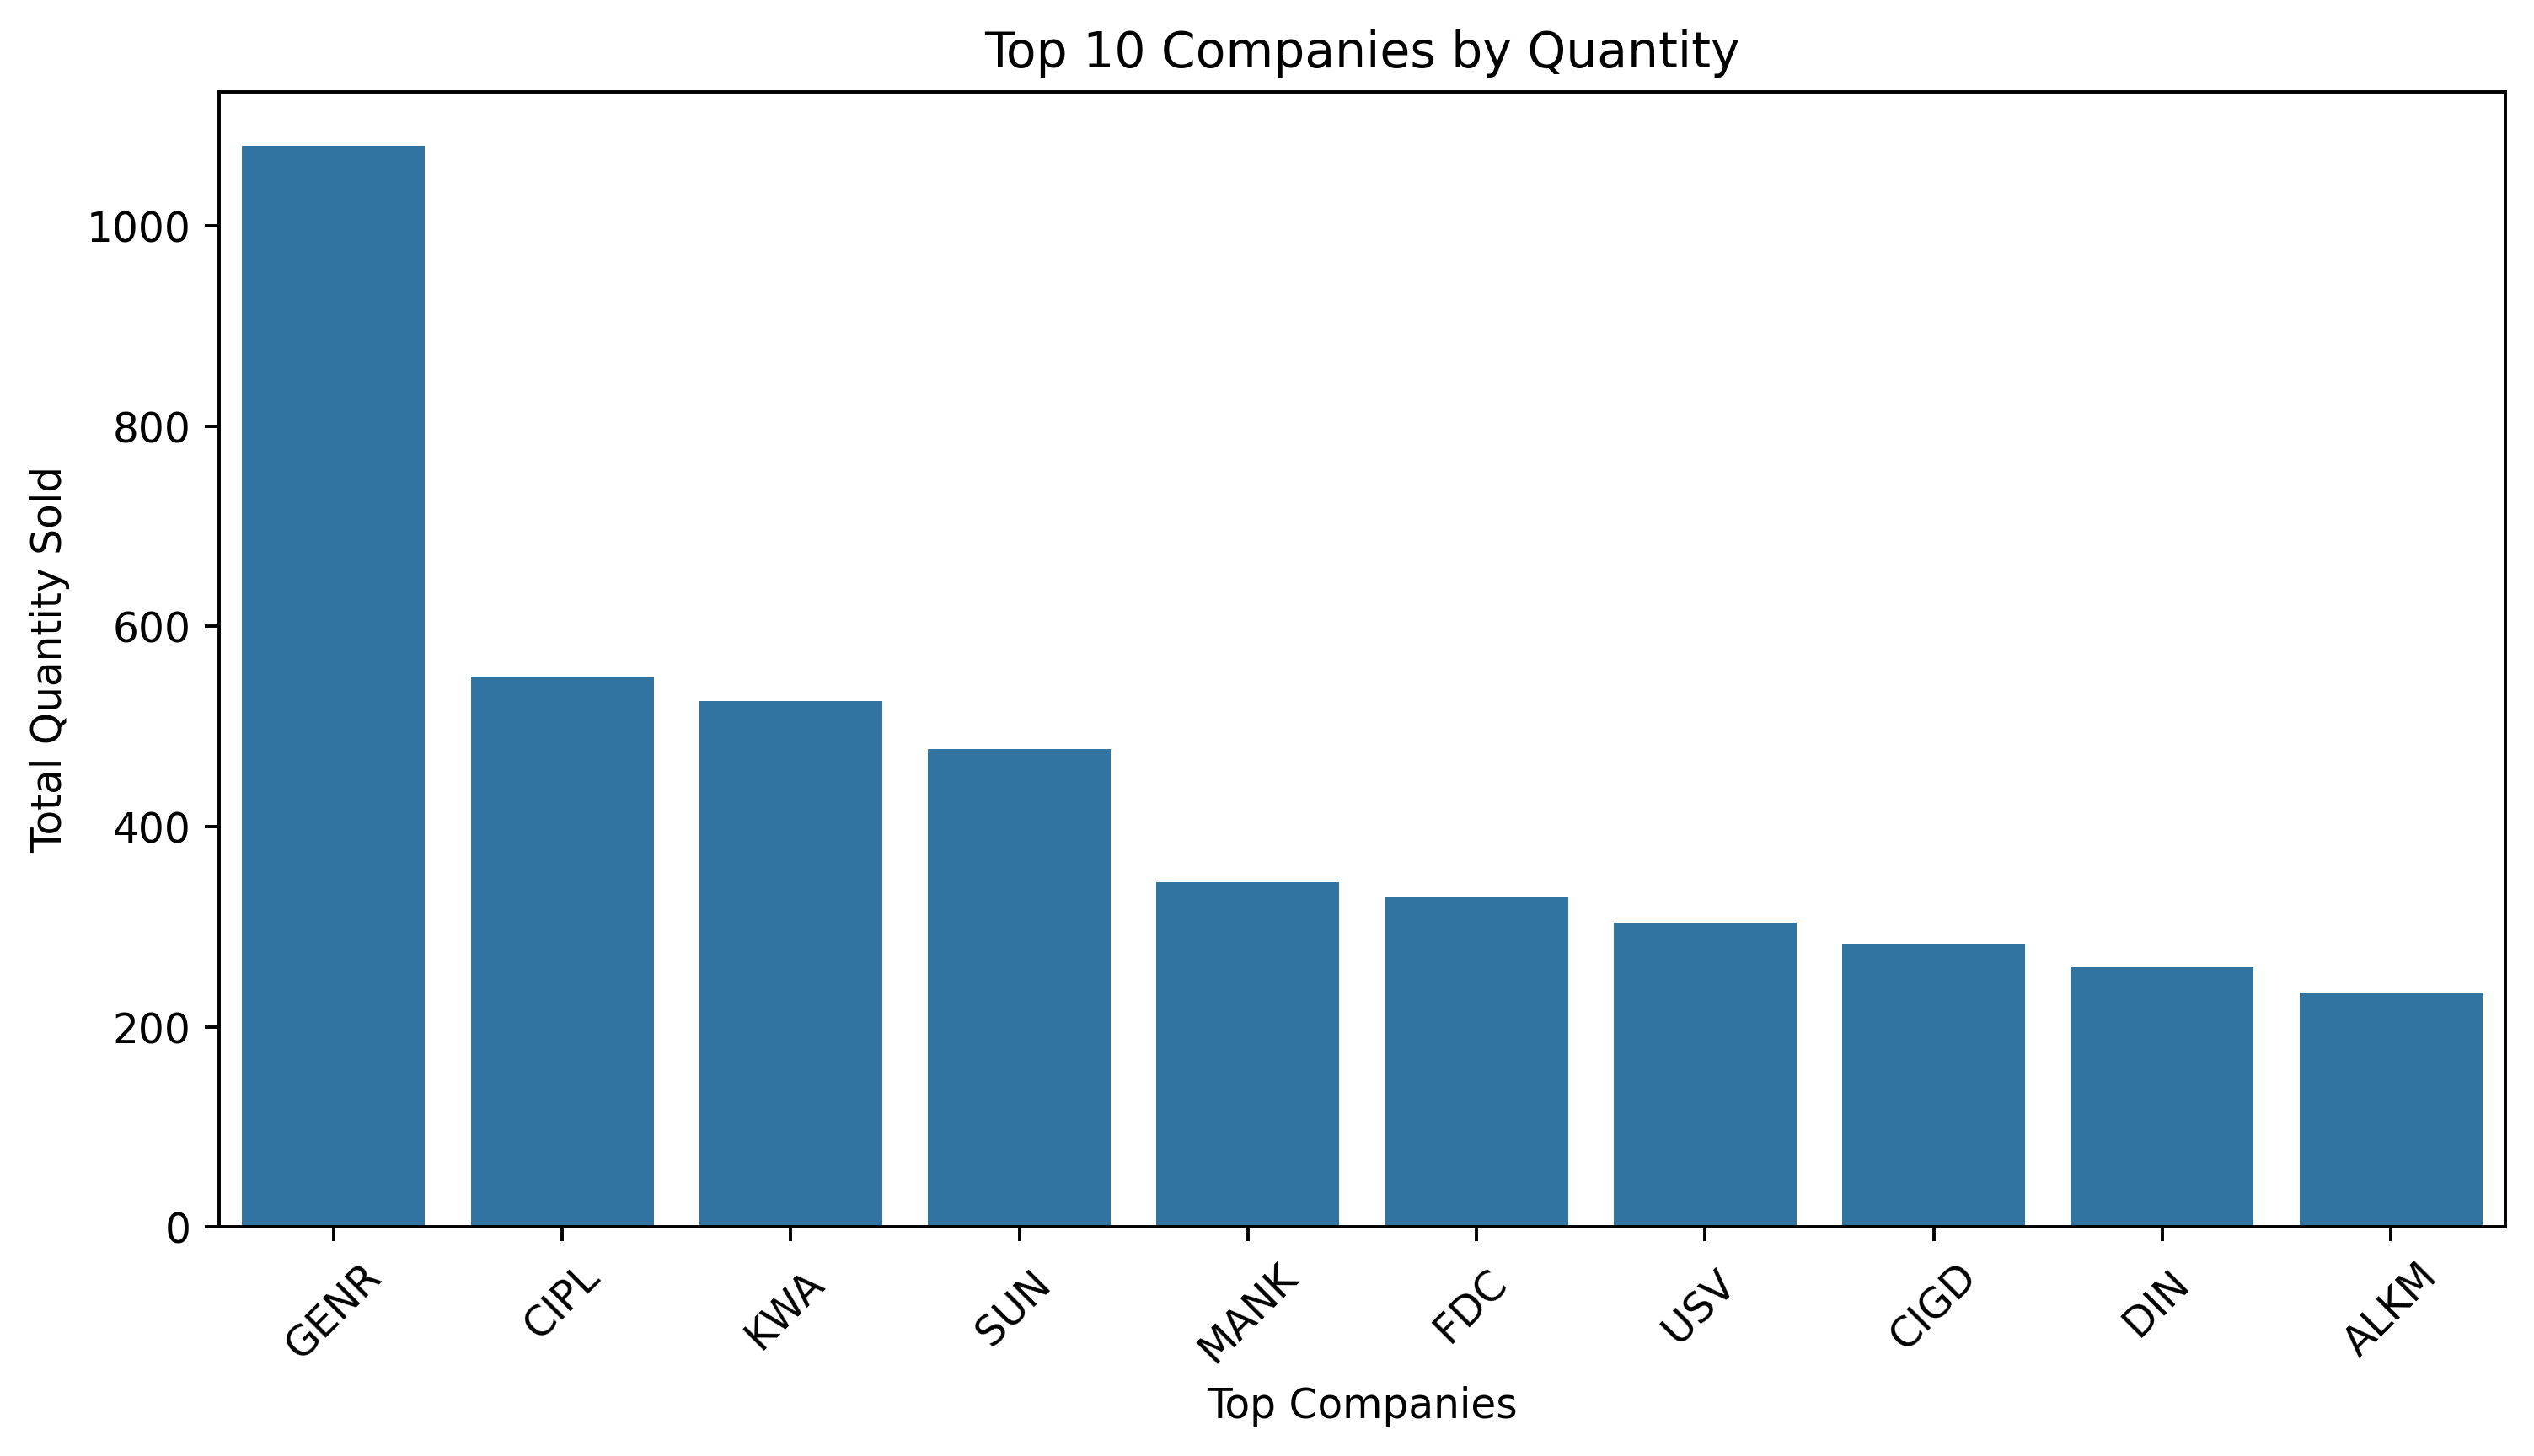

In [24]:
plt.figure(figsize=(10, 5), dpi = 350)
sns.barplot(data = comp_qnty_agg[:10], x = 'Comp', y = 'Qnty')
plt.title('Top 10 Companies by Quantity')
plt.xlabel('Top Companies')
plt.xticks(rotation= 45)
plt.ylabel('Total Quantity Sold')
plt.savefig('Top 10 Companies by Quantity.jpg', format='jpg')
plt.show()

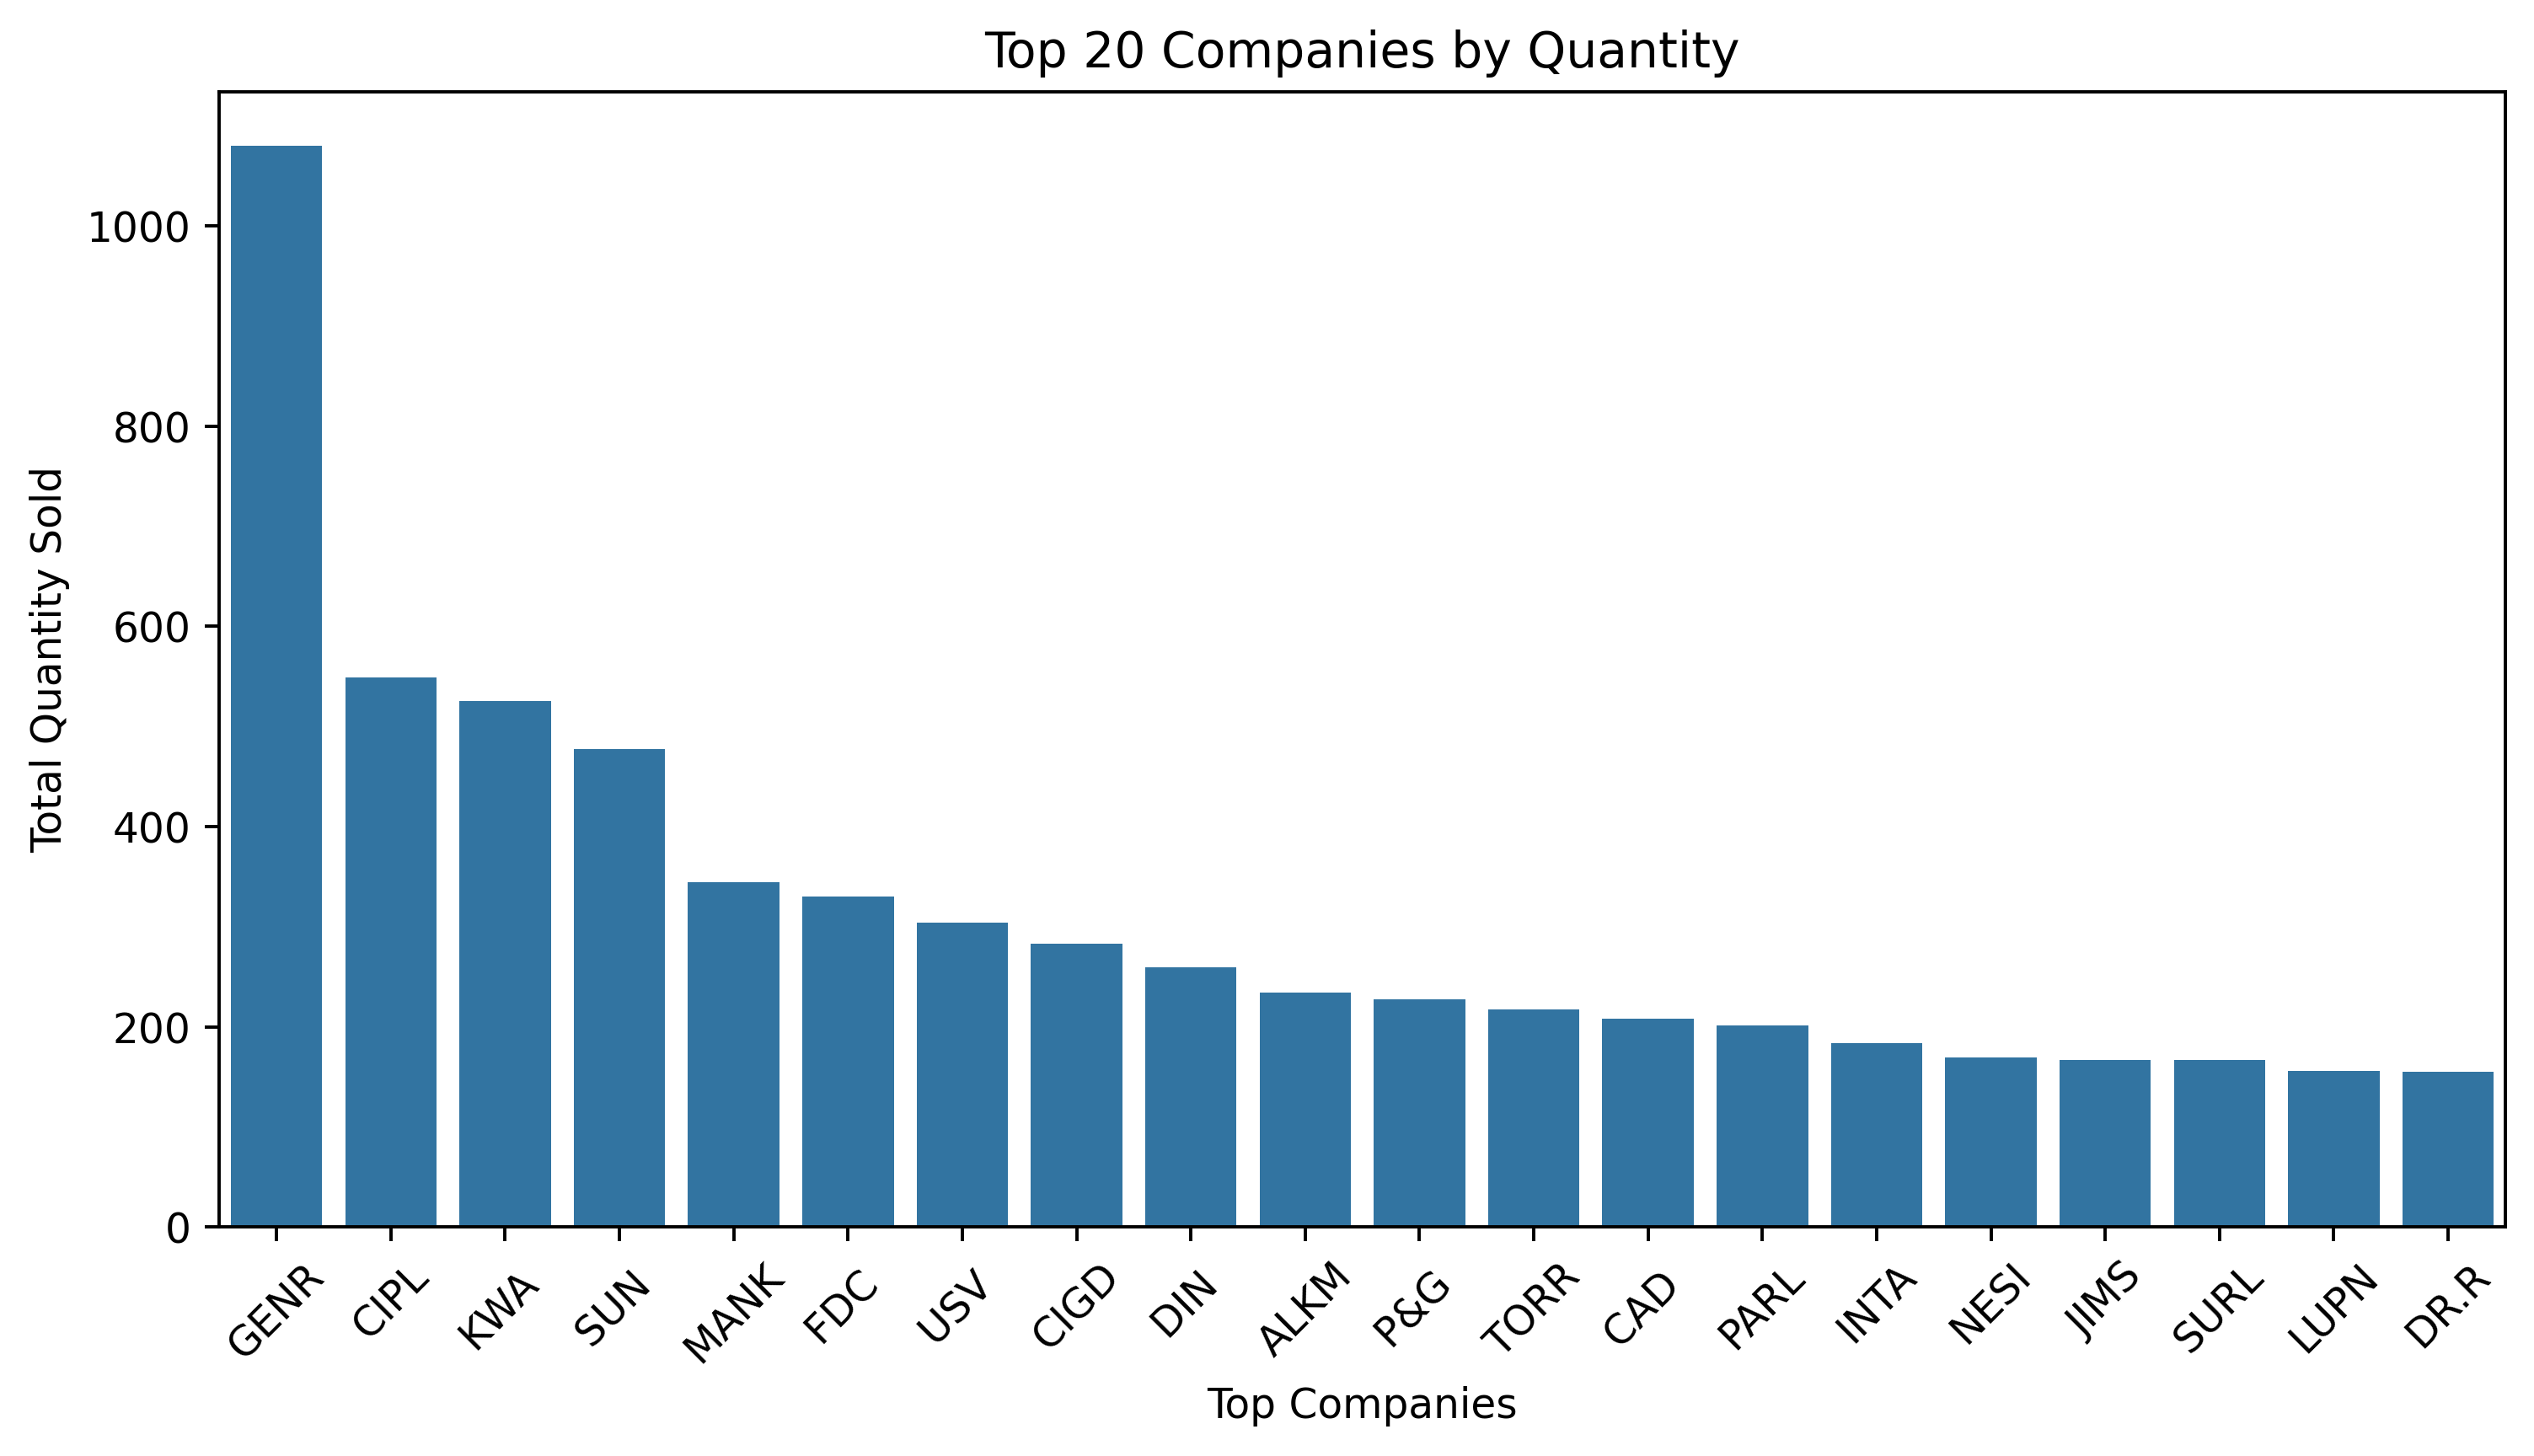

In [25]:
plt.figure(figsize=(10, 5), dpi = 350)
sns.barplot(data = comp_qnty_agg[:20], x = 'Comp', y = 'Qnty')
plt.title('Top 20 Companies by Quantity')
plt.xlabel('Top Companies')
plt.xticks(rotation= 45)
plt.ylabel('Total Quantity Sold')
plt.savefig('Top 20 Companies by Quantity.jpg', format='jpg')
plt.show()

*Next, I will explore the heatmap for Sales and Qnty.*

In [50]:
new_heat = df.pivot_table(index = 'Comp' , values = 'Sales', aggfunc= 'sum')
new_heat.sort_values(by = 'Sales', ascending=False, inplace = True)
new_heat

,Sales
Comp,
SUN,84402.05
GENR,52690.56
ALKM,43989.22
TORR,42969.83
INTA,39058.33
...,...
UNP,0.00
ELDG,0.00
LEKR,-3.30


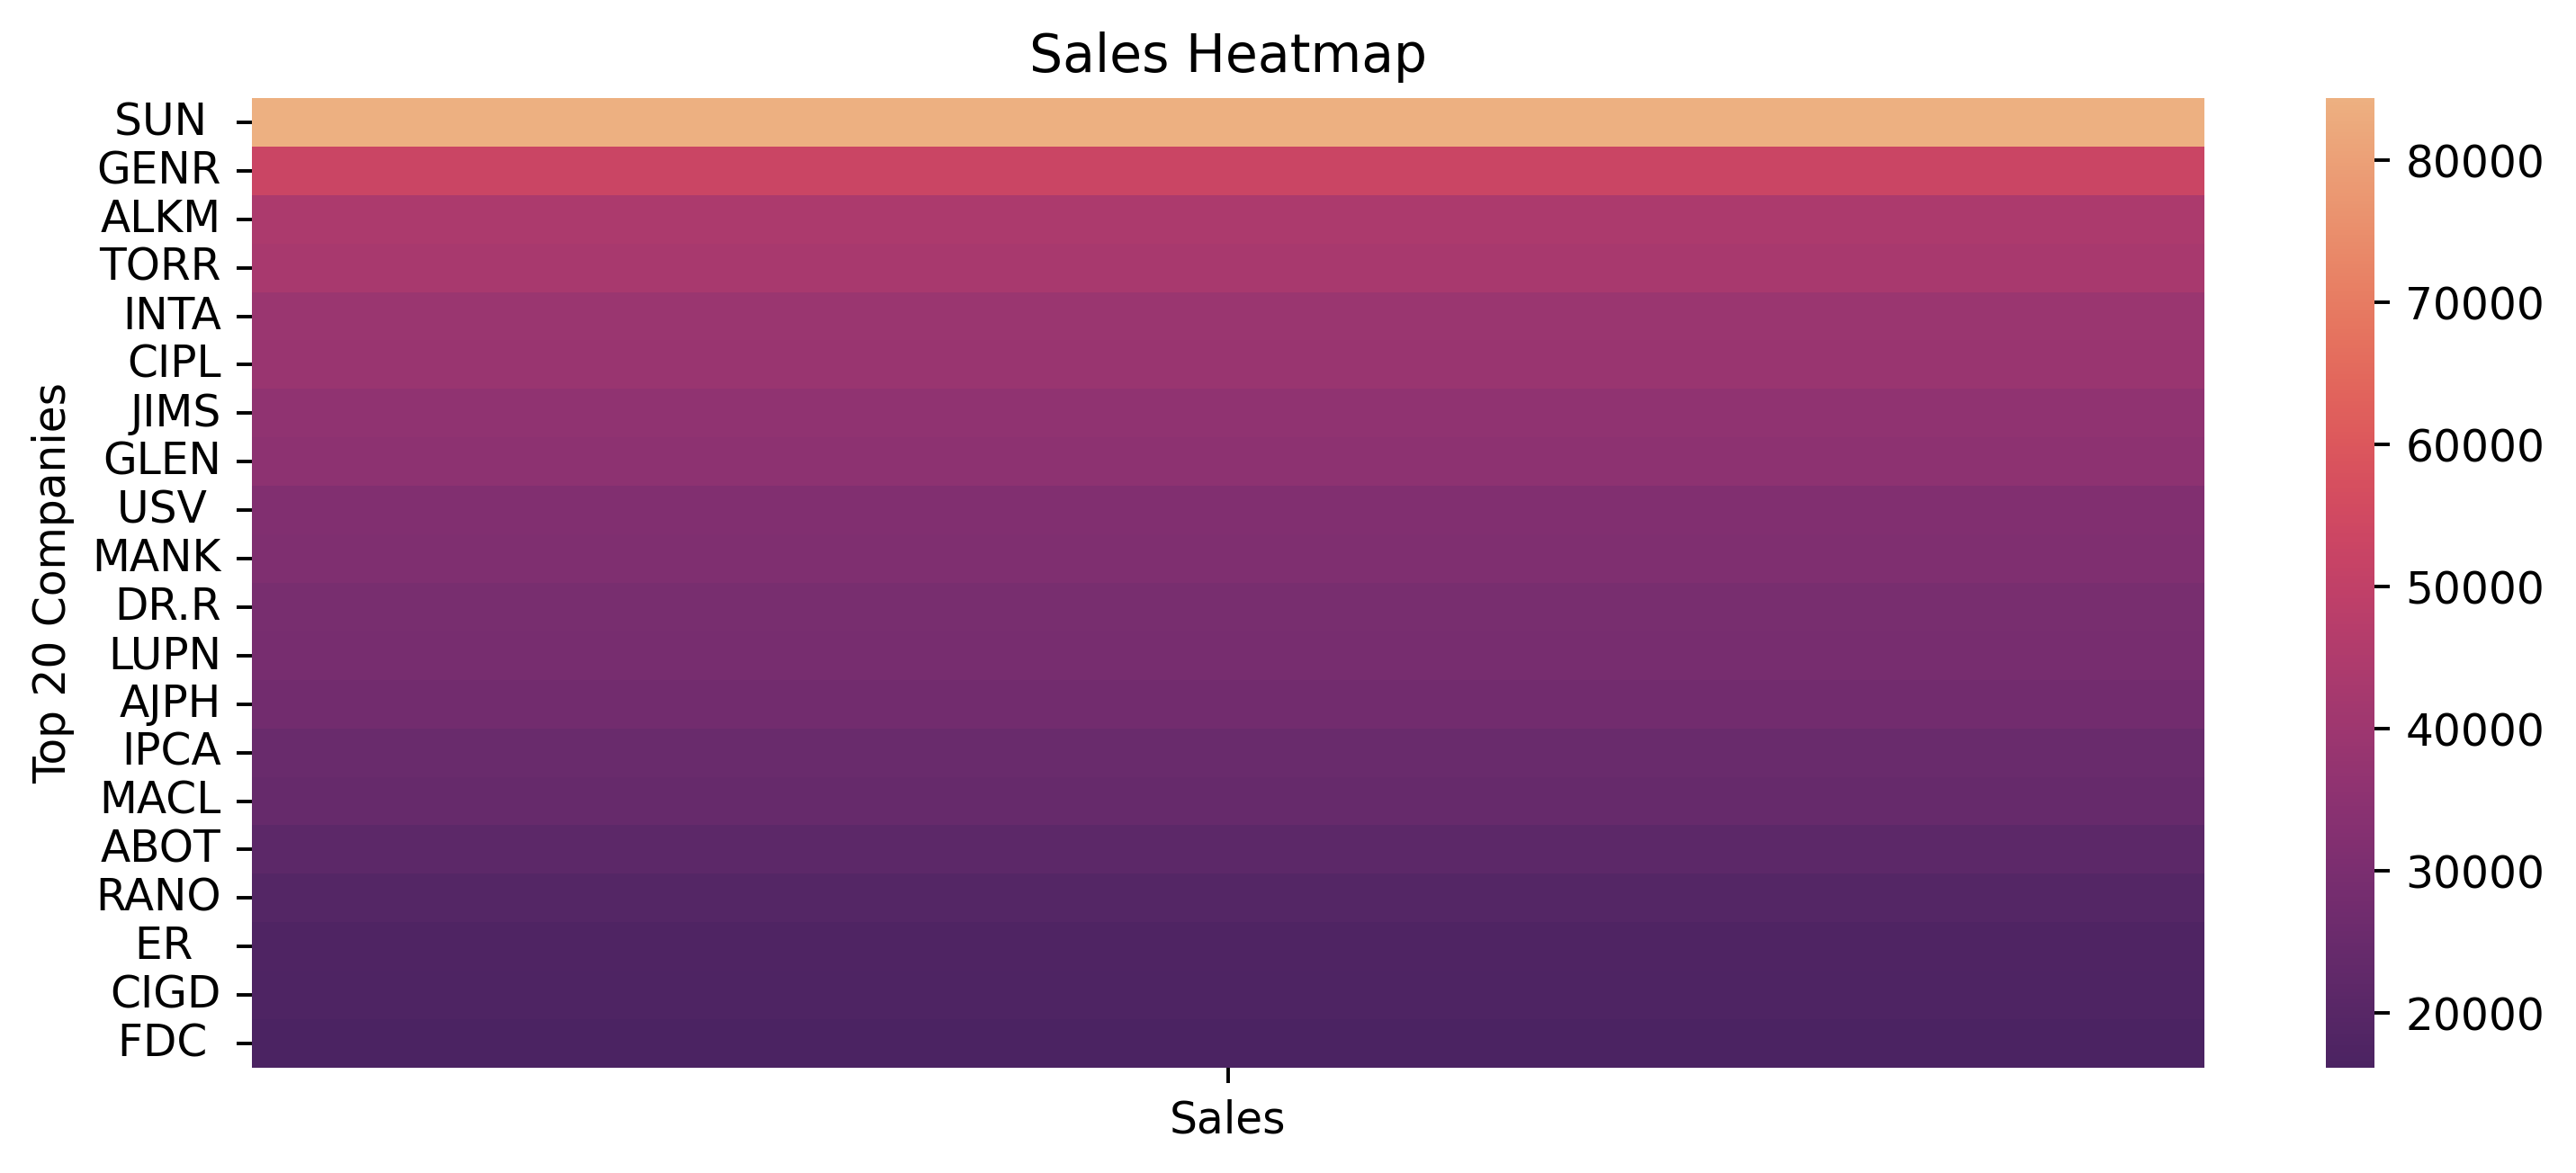

In [58]:
plt.figure(figsize=(10, 4), dpi = 350)
sns.heatmap(data = new_heat[:20], cmap = 'flare_r')
plt.title('Sales Heatmap')
plt.ylabel('Top 20 Companies')
plt.savefig('Top 20 Companies Sales Heatmap.jpg', format='jpg')
plt.show()

In [52]:
new_heat1 = df.pivot_table(index = 'Comp' , values = 'Qnty', aggfunc= 'sum')
new_heat1.sort_values(by = 'Qnty', ascending=False, inplace = True)
new_heat1

,Qnty
Comp,
GENR,1080
CIPL,549
KWA,525
SUN,477
MANK,344
...,...
BAYD,1
LEKR,0
ELDG,0


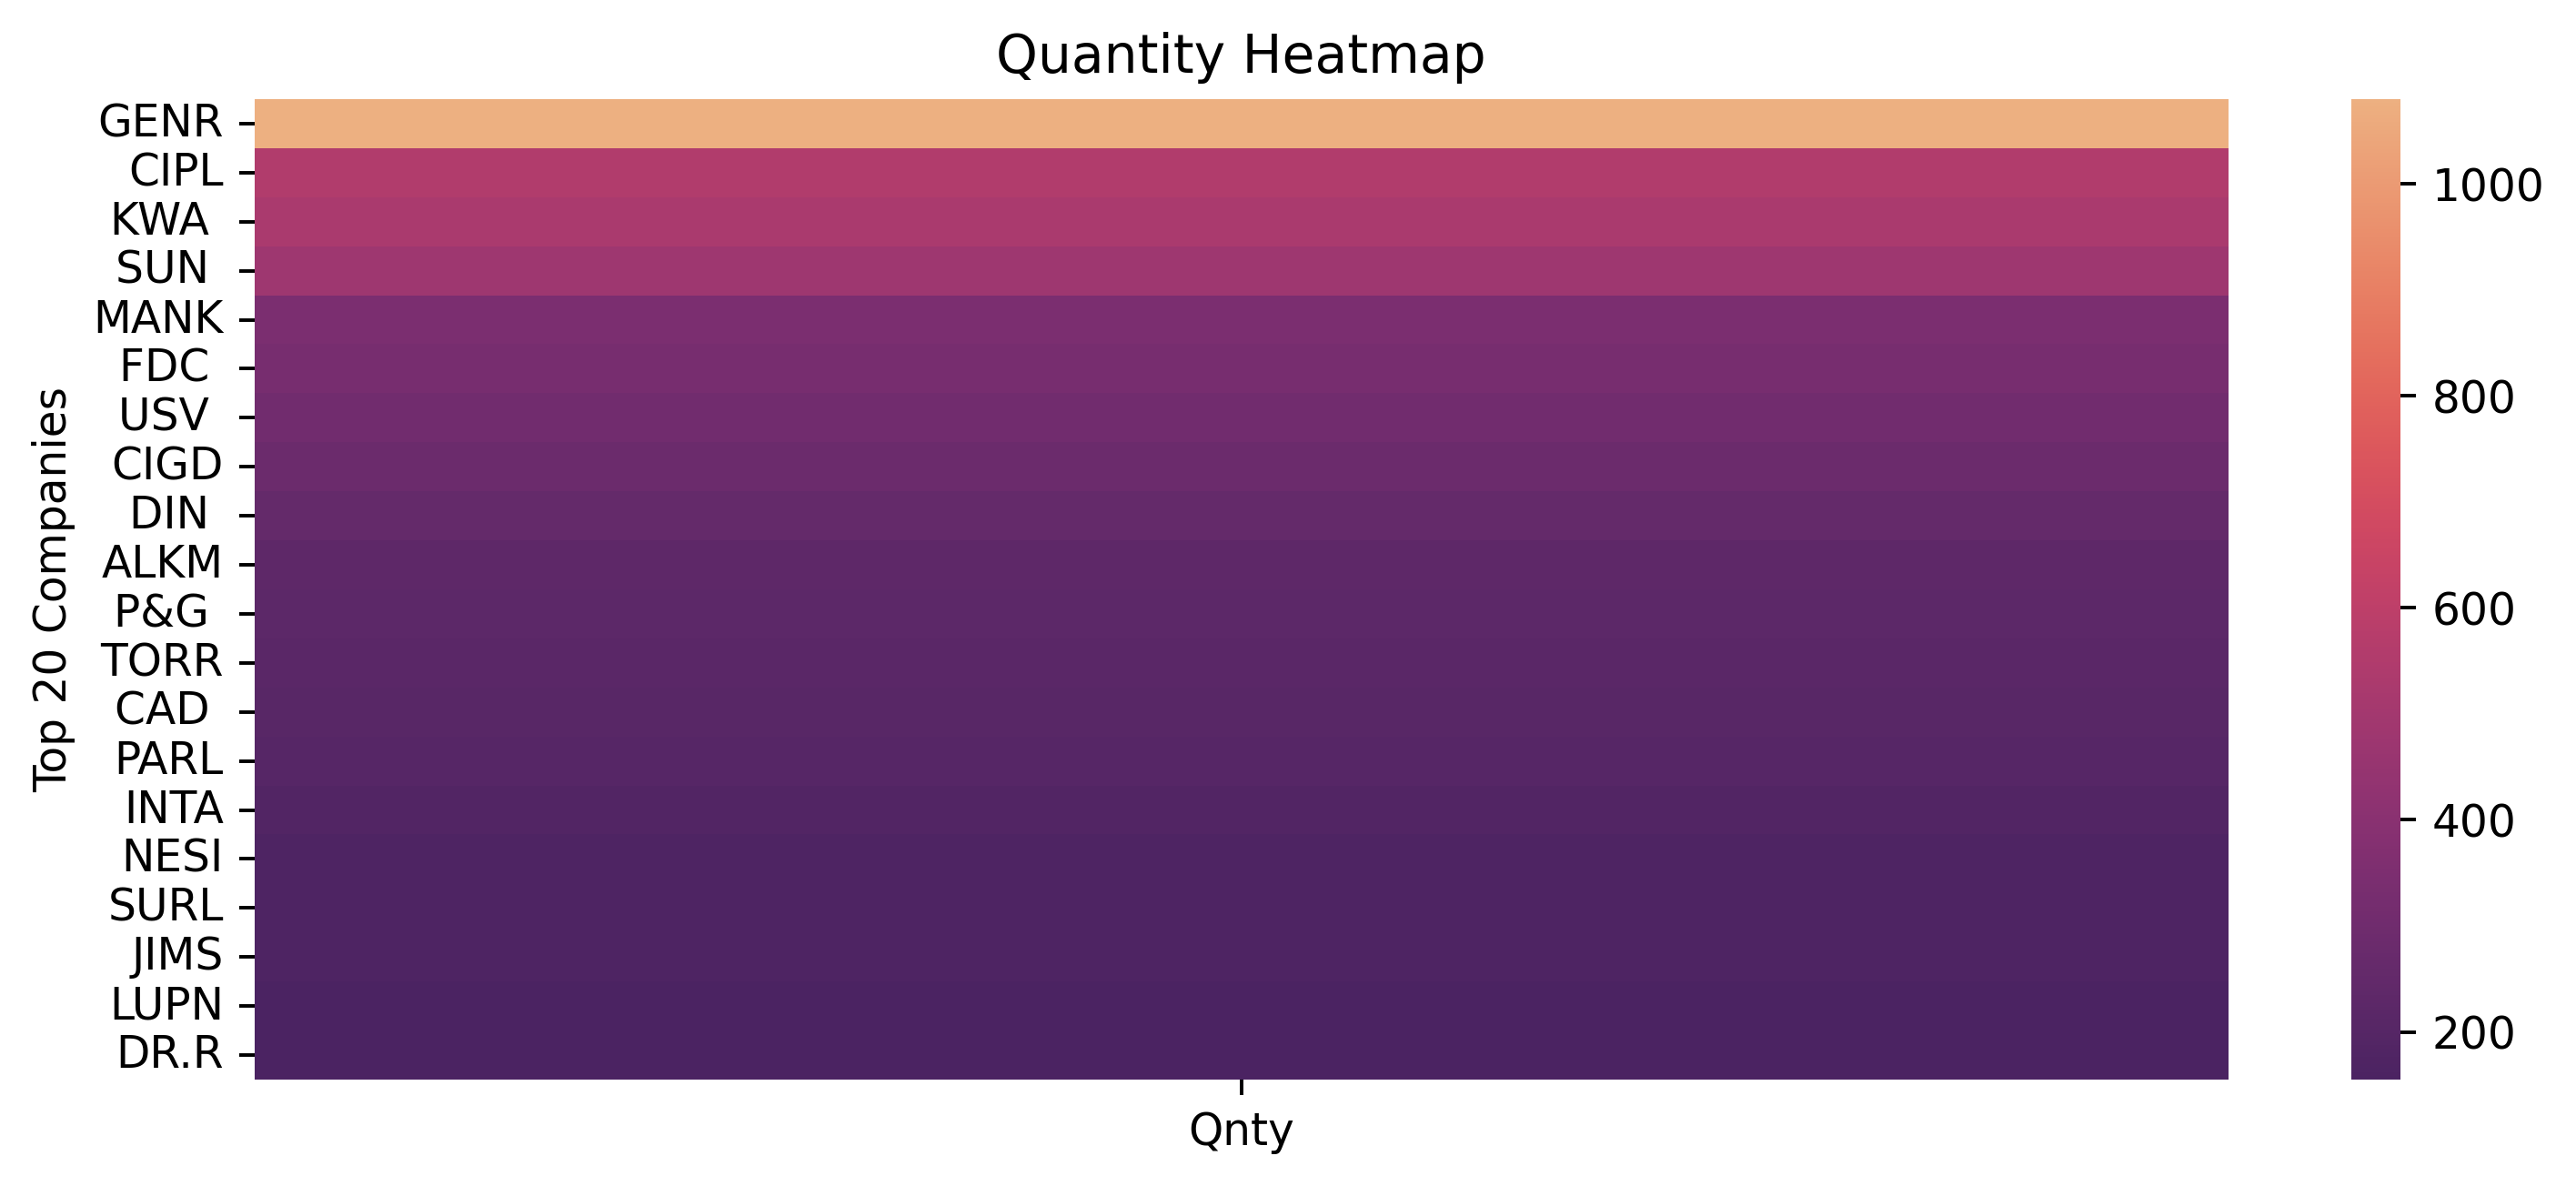

In [59]:
plt.figure(figsize=(10, 4), dpi = 350)
sns.heatmap(data = new_heat1[:20], cmap = 'flare_r')
plt.title('Quantity Heatmap')
plt.ylabel('Top 20 Companies')
plt.savefig('Top 20 Companies Qnty Heatmap.jpg', format='jpg')
plt.show()

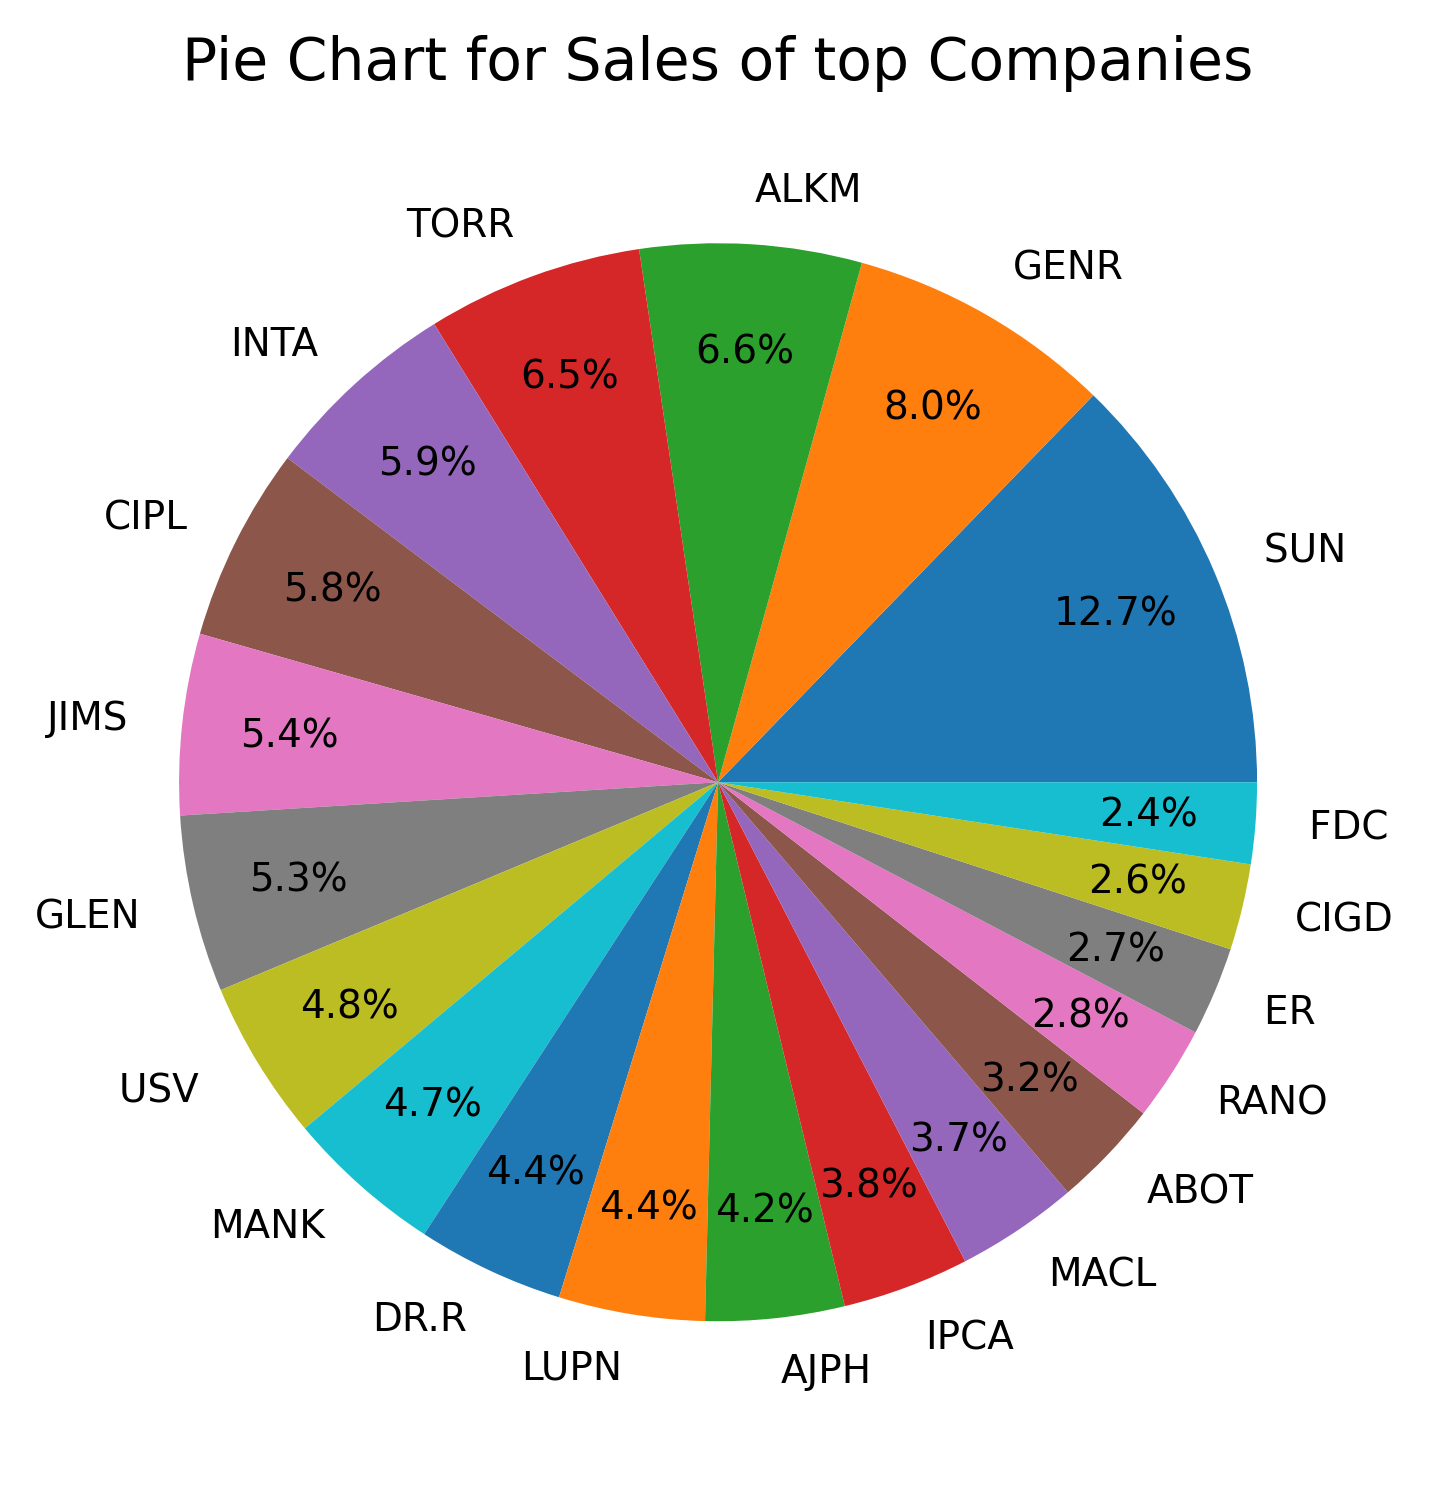

In [87]:
plt.figure(figsize=(5, 5), dpi=350)
plt.pie(comp_agg.Sales[:20], labels = comp_agg.index[:20], autopct = '%.1f%%', pctdistance= 0.8, textprops={'fontsize':8})
plt.title('Pie Chart for Sales of top Companies')
# plt.savefig('Pie Chart for Sales of Top Companies.jpg', format= 'jpg')
plt.show()

*I noticed that the piechart above is not a true representation of sales, as it does not accurately give the % sales of total sales.*

In [116]:
othersdf = pd.DataFrame({'Sales': new_heat[20:]['Sales'].sum()}, index=['Others'])
othersdf

,Sales
Others,847681.11


In [117]:
new_pie_sales = pd.concat([comp_agg[:20], othersdf])
new_pie_sales

,Stock,Qnty,Sales
SUN,220.0,477.0,84402.05
GENR,4573.0,1080.0,52690.56
ALKM,118.0,234.0,43989.22
TORR,97.0,217.0,42969.83
INTA,112.0,184.0,39058.33
CIPL,344.0,549.0,38612.63
JIMS,107.0,167.0,35948.00
GLEN,85.0,151.0,35204.32
USV,120.0,304.0,31774.12
MANK,220.0,344.0,31297.01


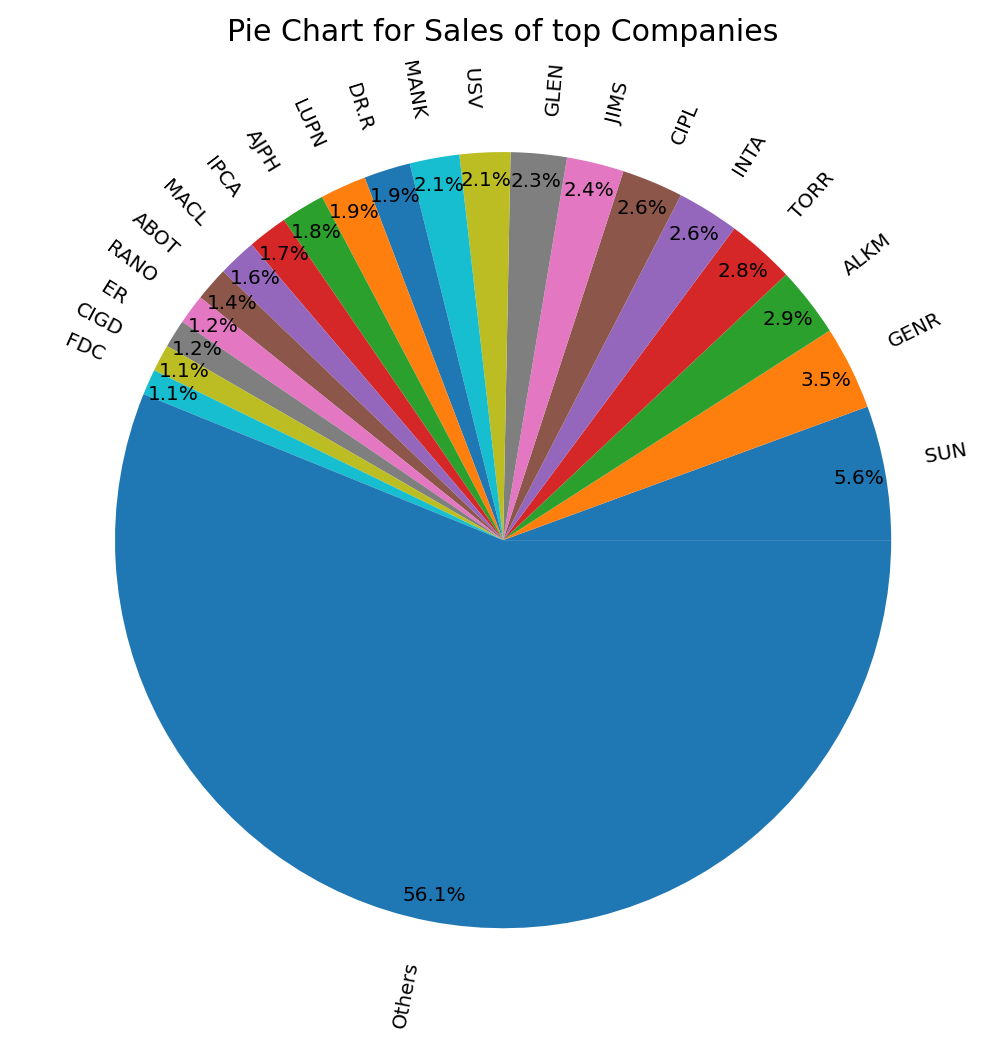

In [137]:
plt.figure(figsize=(7,7), dpi = 180)
plt.pie(new_pie_sales.Sales, labels = new_pie_sales.index, rotatelabels= 45, autopct = '%.1f%%', pctdistance= .93, textprops={'fontsize':8})
plt.title('Pie Chart for Sales of top Companies')
plt.savefig('Pie Chart for Sales of Top Companies.jpg', format= 'jpg')
plt.show()

*Let's look at heatmap of Stock and Quantity*

In [175]:
newdf = df.sort_values(by='Abs Discrepancy', ascending = False)
newdf = newdf.set_index('Comp')
newdf

,Code,Item Description,Packing,Stock,Qnty,Sales,Discrepancy,Abs Discrepancy
Comp,,,,,,,,
GENR,22075,HANSAPLAST WASHPROOF,8 PC,2374,122,366.0,2252,2252
SURL,22070,HANSAPLAST PLAIN,1PC,1342,25,60.0,1317,1317
P&G,53290,VICKS COUGH DROPS,1PC,707,127,127.0,580,580
DAB1,23155,HONITUS DROP LEMON,1PC,551,20,20.0,531,531
SURL,62182,FACE MASK BLUE,1PC,417,29,144.0,388,388
...,...,...,...,...,...,...,...,...
DR.,65335,DR.RASHEL NOSE STRIP,1P,1,1,56.0,0,0
CAD,6790,CADB.BOURNVILLE CRANBERRY,80GM,2,2,220.0,0,0
CAD,48690,TANG JUICE ORANGE,500GM,2,2,330.0,0,0


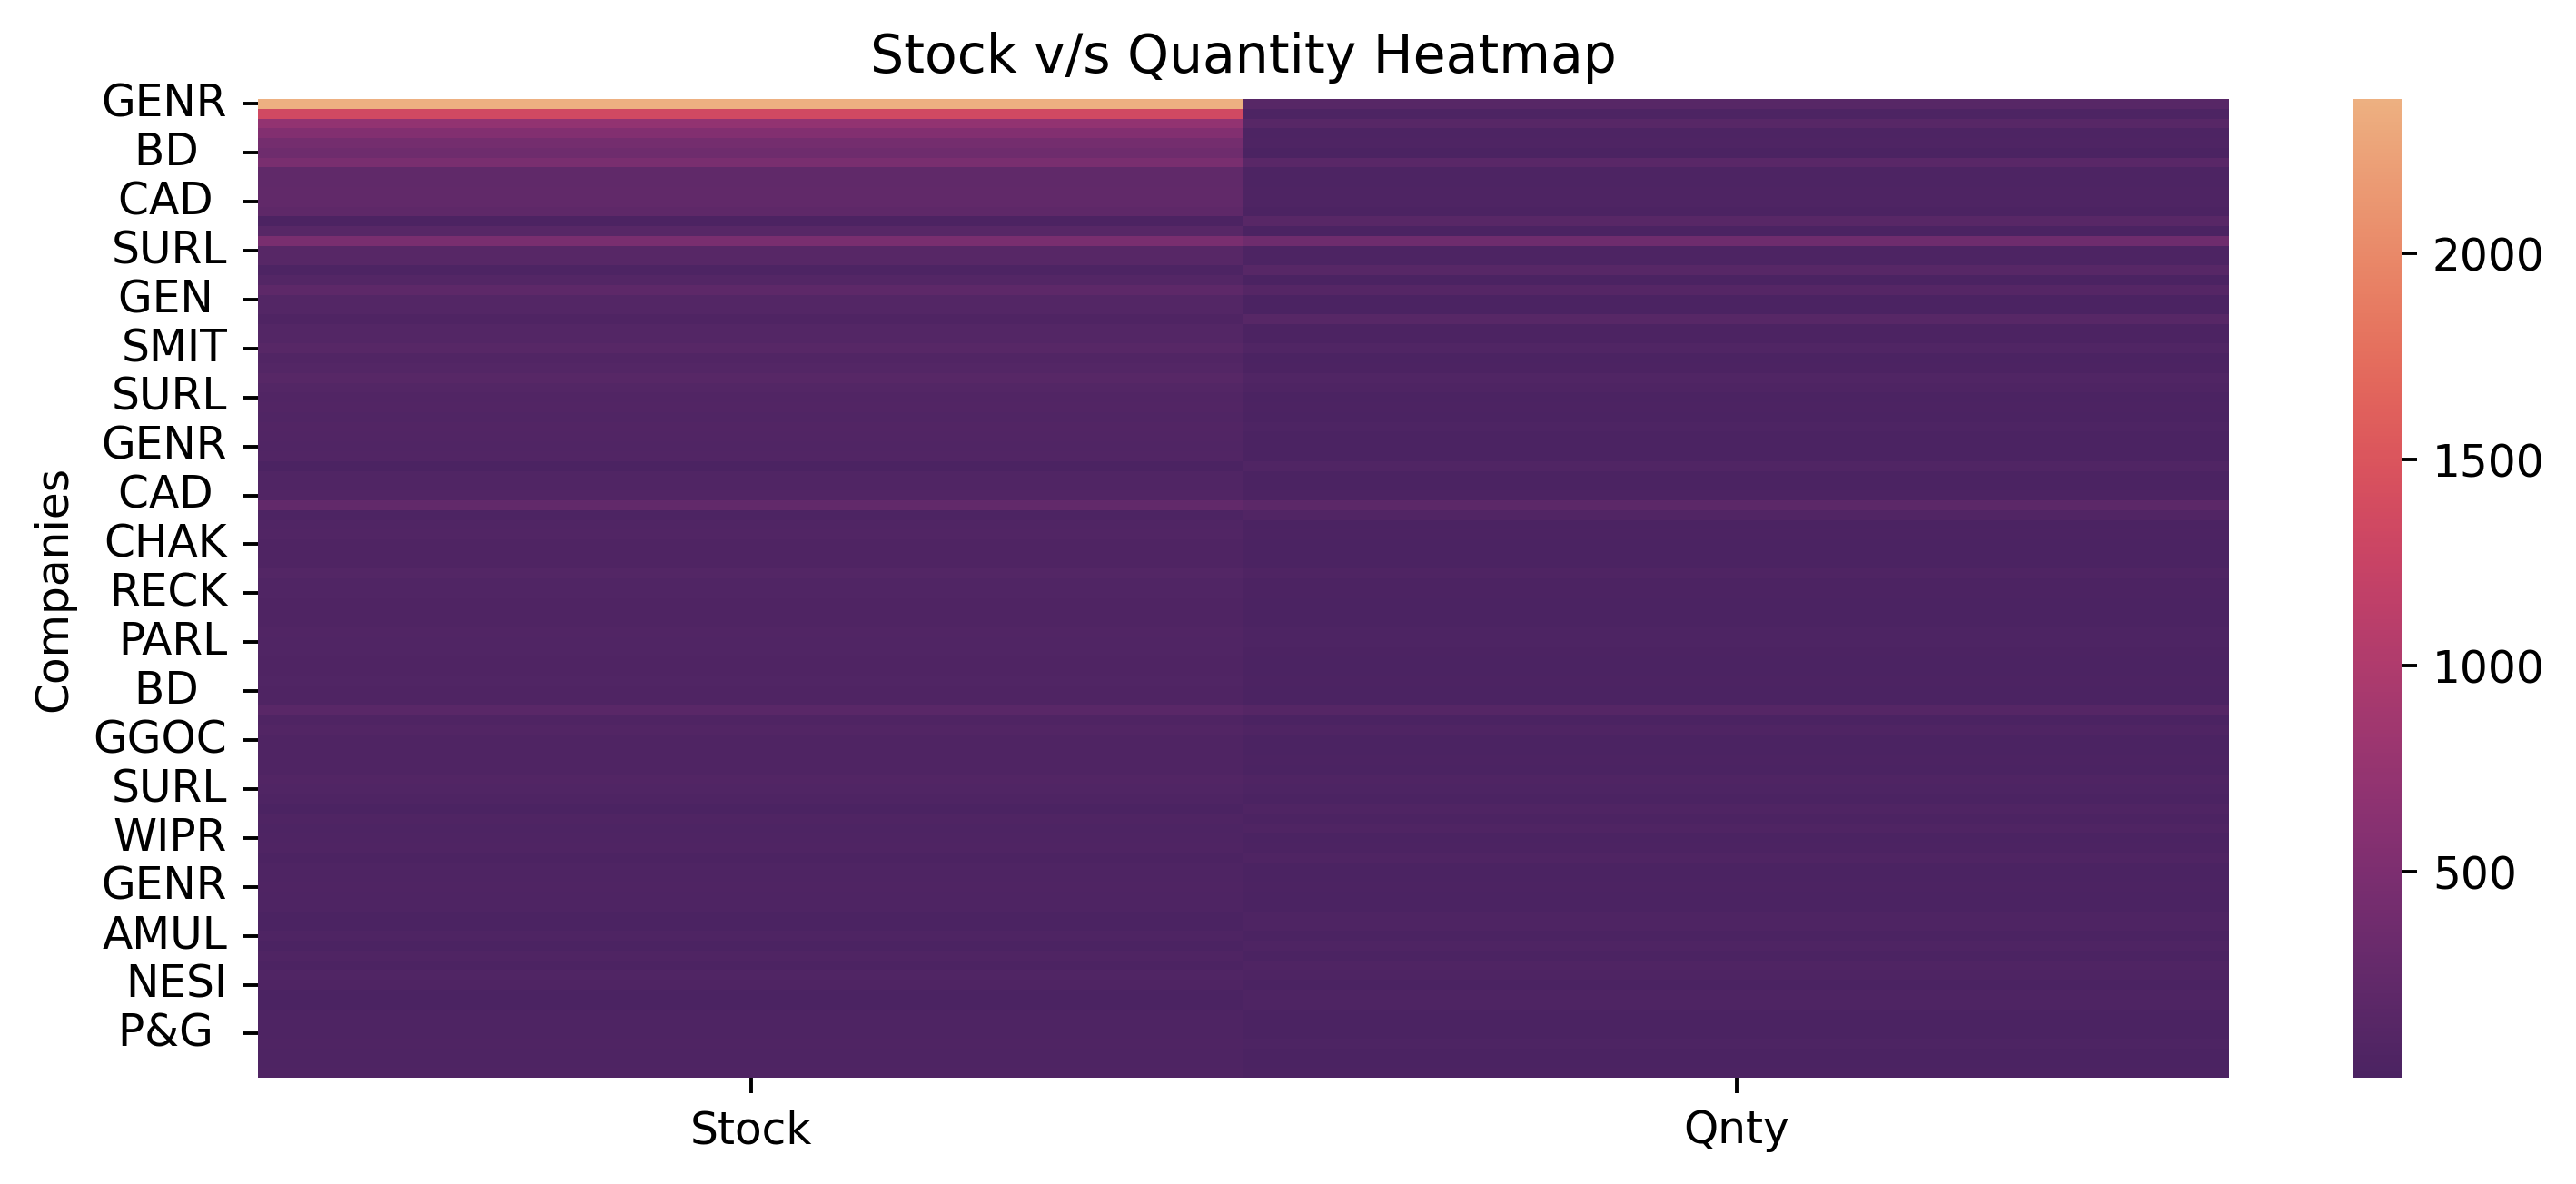

In [177]:
plt.figure(figsize=(10, 4), dpi = 350)
sns.heatmap(data = newdf[['Stock', 'Qnty']][:100], cmap = 'flare_r')
plt.title('Stock v/s Quantity Heatmap')
plt.ylabel('Companies')
plt.savefig('Top 100 Dicrepancies Heatmap.jpg', format='jpg')
plt.show()


*I can clearly see that the medical is overstocked on certain items, to view the bigger picture, I will create a new df and plot these discrepancies.*

In [178]:
ndf = df
ndf['Discrepancy'] = (df.Stock - df.Qnty)
ndf['Abs Discrepancy'] = abs(df.Stock - df.Qnty)
top100 = ndf.sort_values(by='Abs Discrepancy', ascending=False).head(100)
top100

,Comp,Code,Item Description,Packing,Stock,Qnty,Sales,Discrepancy,Abs Discrepancy
7,GENR,22075,HANSAPLAST WASHPROOF,8 PC,2374,122,366.0,2252,2252
62,SURL,22070,HANSAPLAST PLAIN,1PC,1342,25,60.0,1317,1317
4,P&G,53290,VICKS COUGH DROPS,1PC,707,127,127.0,580,580
77,DAB1,23155,HONITUS DROP LEMON,1PC,551,20,20.0,531,531
49,SURL,62182,FACE MASK BLUE,1PC,417,29,144.0,388,388
...,...,...,...,...,...,...,...,...,...
790,P&G,53289,VICKS ACTION 500,10T,33,4,284.2,29,29
57,BRIT,57111,BOURBON NEW&CHOCOLATIER,60G,54,25,250.0,29,29
792,P&G,54727,WHISPER CHOICE ULTRA XL,6PC,33,4,170.0,29,29
731,HLLD,48087,SURF EXCEL POW,90G,32,4,40.0,28,28


In [179]:
top100.describe()

,Code,Stock,Qnty,Sales,Discrepancy,Abs Discrepancy
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,35197.290000,128.49000,31.080000,731.036900,97.410000,111.410000
std,21053.896271,284.21078,49.812716,1238.251611,271.456531,265.961723
min,1125.000000,1.00000,1.000000,5.800000,-123.000000,28.000000
25%,16005.500000,38.75000,5.750000,97.750000,31.750000,35.000000
50%,34094.000000,58.50000,13.500000,191.140000,45.000000,48.000000
75%,57885.750000,88.00000,34.500000,570.000000,65.500000,69.750000
max,65119.000000,2374.00000,360.000000,6216.000000,2252.000000,2252.000000


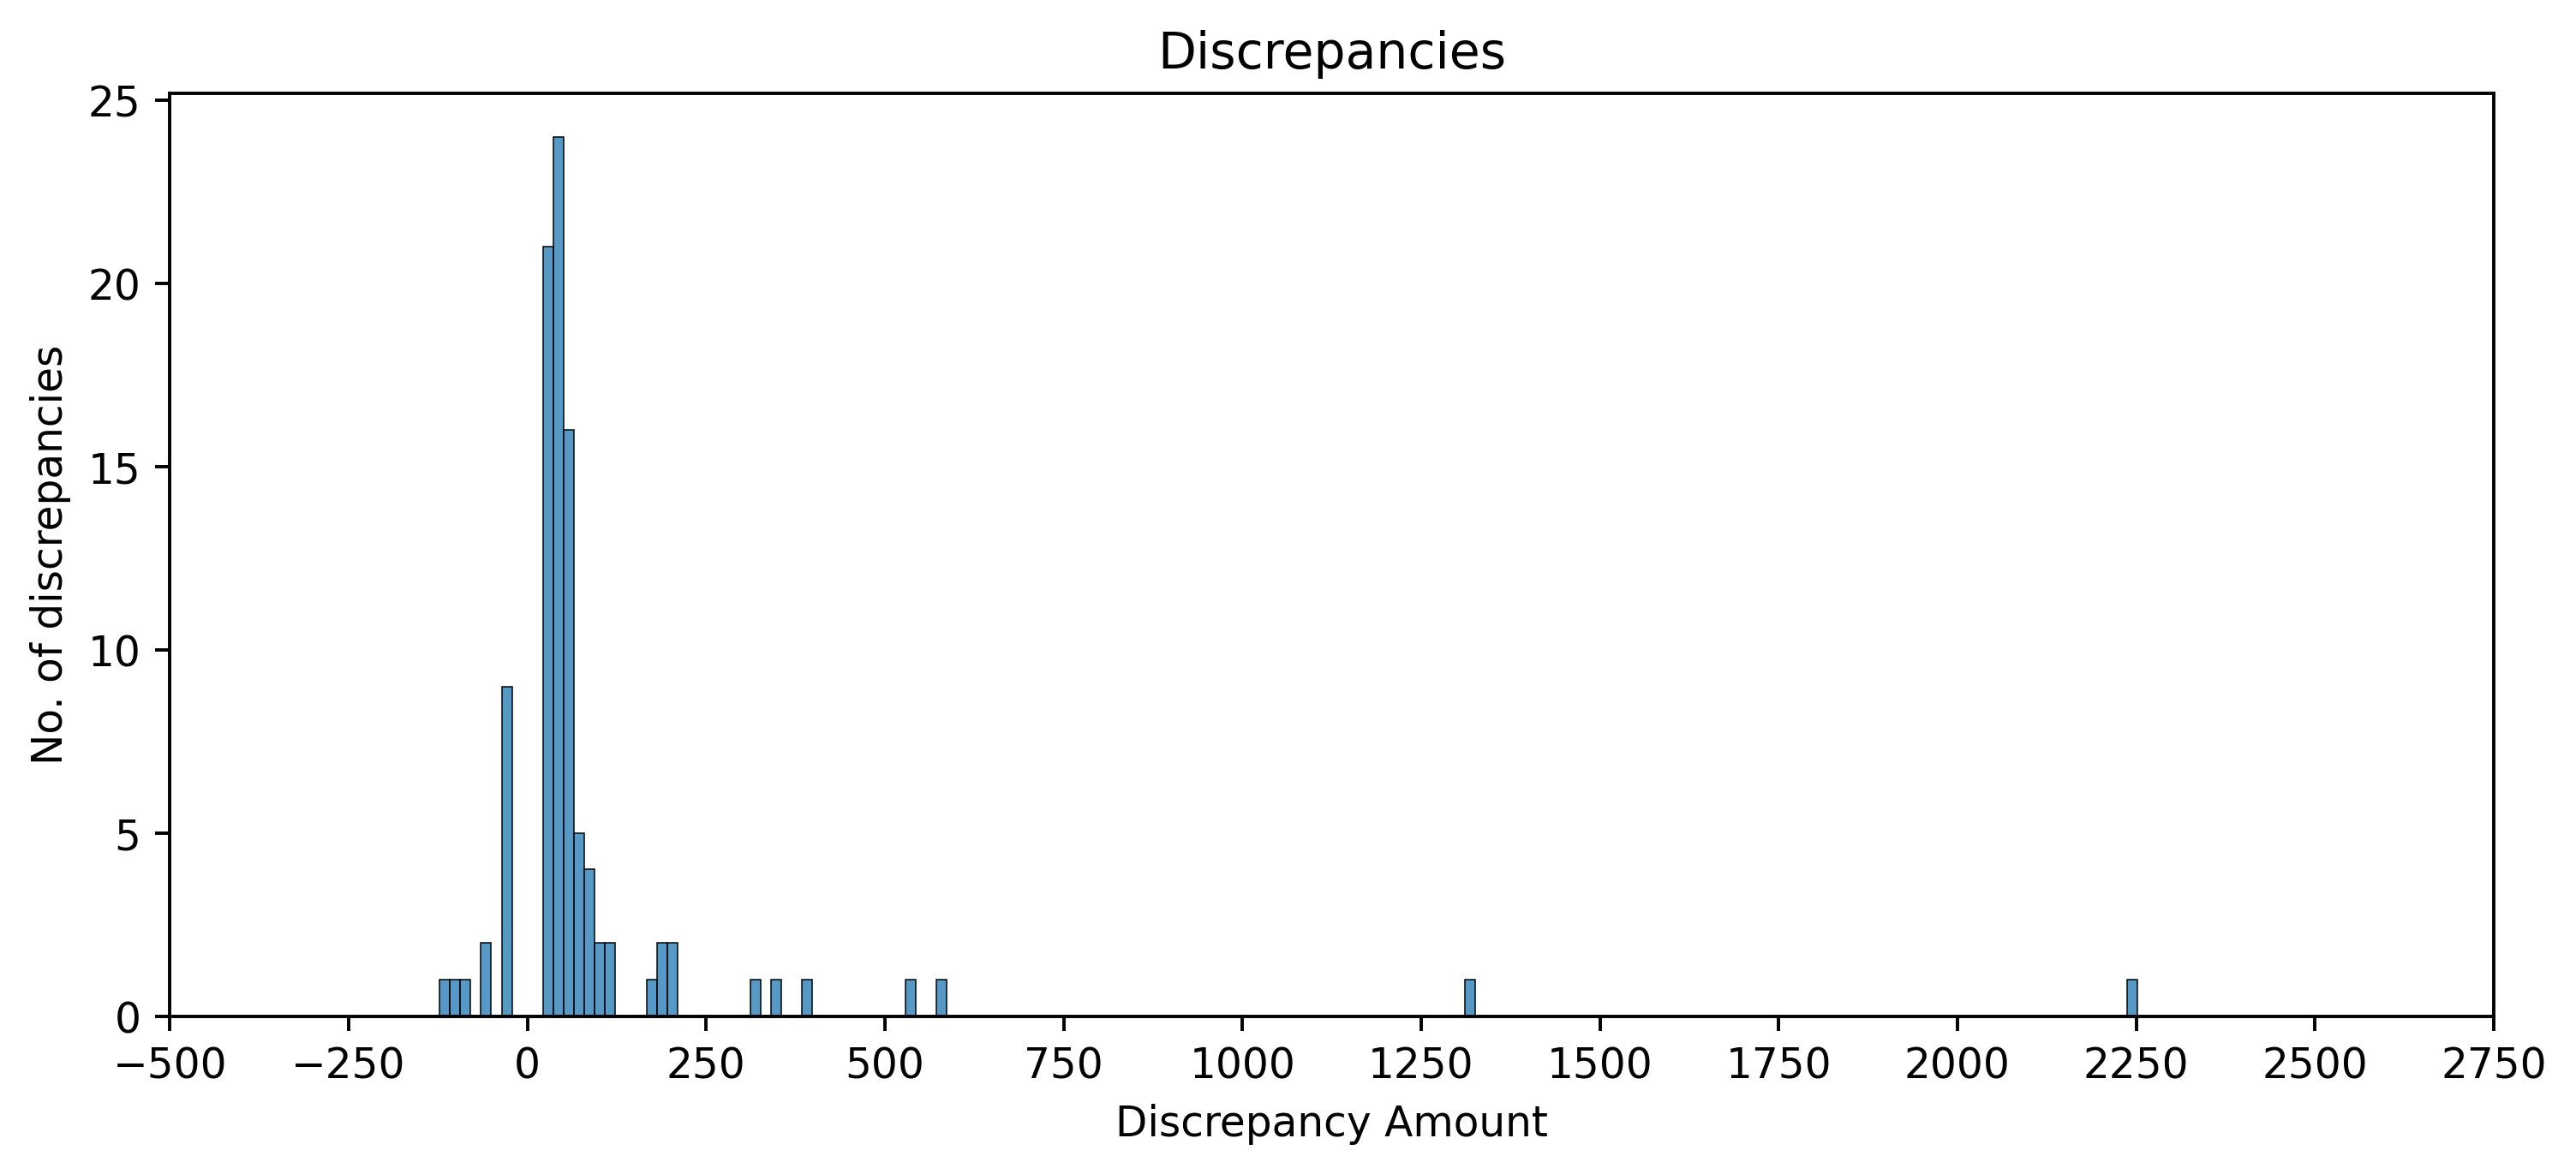

In [195]:
plt.figure(figsize=(10, 4), dpi = 350)
sns.histplot(data = top100, x = 'Discrepancy')
plt.title('Discrepancies')
plt.xlabel('Discrepancy Amount')
plt.xticks(ticks = range(-500, 3000, 250))
plt.ylabel('No. of discrepancies')
plt.savefig('Discrepancy.jpg', format='jpg')
plt.show()
